# Ch5-Q15. SSMO Implementation

## SSMO Class : trainig and scoring

In [2]:
class SSMO:
    def __init__(self, X, z):
        self.X = X
        self.z = z

    def train(self, kernel, pairs, C, e=1.e-12):
        # given labeled traning data (Xi, zi) for i=1,...,n
        X, z = self.X, self.z
        # given regularization parameter C > 0 
        n = X.shape[0]
        # initialize lambda_i=0 (i=1,...,n) and b=0
        la, b = [0] * n, 0
        # given e = numberical tolerance
 
        # repeat...
        num_updates = 0
        # select indices i, j = {1,...,n} with i != j
        for (i, j) in pairs:
            d = 2 * kernel(X[i], X[j]) - kernel(X[i], X[i]) - kernel(X[j], X[j])
            if abs(d) < e: # ignore
                continue
            # otherwise, if abs(d) > e:
            num_updates += 1
            zi, zj = z[i], z[j]
            # Ei = f(Xi)-zi
            fXi = SSMO.score(kernel, z, la, X, b, X[i])
            Ei = fXi - zi
            # Ej = f(Xj)-zj
            fXj = SSMO.score(kernel, z, la, X, b, X[j])
            Ej = fXj - zj
            _li, _lj = la[i], la[j]
            lj = _lj - zj * (Ei - Ej) / d
            if zi == zj:
                low = max(0, _li + _lj - C)
                high = min(C, _li + _lj)
            else:
                low = max(0, _lj - _li)
                high = min(C, C + _lj - _li)
            # clamp on lambda_j
            if lj > high:
                lj = high
            elif lj < low:
                lj = low
            else: # use it as it is (low <= lj <= high)
                pass

            # update li
            li = _li + zi * zj * (_lj - lj)
            la[i], la[j] = li, lj
            bi = b - Ei - zi * (li - _li) * (X[i] @ X[i]) -\
                          zj * (lj - _lj) * (X[j] @ X[i])
            bj = b - Ej - zi * (li - _li) * (X[i] @ X[j]) -\
                          zj * (lj - _lj) * (X[j] @ X[j])
            if 0 < li < C:
                b = bi
            elif 0 < lj < C:
                b = bj
            else:
                b = (bi + bj) / 2        
        return num_updates, la, b
    
    def weights(z, la, X):
        return (np.array(z) * np.array(la)) @ X

    def score(kernel, z, la, X, b, Xk):
        """
        sum_i^{n} z_i lambda_i (X_i dot X) + b
        """
        s = b
        for il in range(len(la)):
            s += z[il] * la[il] * kernel(X[il], Xk)
        return s


## ordered pair for SVM trainig using SSMO

In [27]:
import numpy as np
X = np.array([[3, 3], [3, 4], [2, 3], [1, 1], [1, 3], [2, 2]])
z = np.array([    1,      1,      1,     -1,     -1,     -1])
print(X)

# instantiation of class object
svm = SSMO(X, z)
# linear kernel
kernel = lambda Xi, Xj: (Xi @ Xj)
# given ordered paris (lambda_i, lambda_j)
pair_set = [ # 1-based indices
    [(1, 2), (2, 3), (3, 4), (4, 5), (5, 6)],
    [(1, 3), (2, 4), (3, 5), (4, 6)],
    [(1, 4), (2, 5), (3, 6)],
    [(1, 5), (2, 6)],
    [(1, 6)],
    [(2, 1), (3, 2), (4, 3), (5, 4), (6, 5)],
    [(3, 1), (4, 2), (5, 3), (6, 4)],
    [(4, 1), (5, 2), (6, 3)],
    [(5, 1), (6, 2)],
    [(1, 6)],
]
print(pair_set)
pairs = list() # combine all indices with 0-based
for row in pair_set:
    for i, j in row:
        pairs.append((i - 1, j - 1)) # 0-based indices

[[3 3]
 [3 4]
 [2 3]
 [1 1]
 [1 3]
 [2 2]]
[[(1, 2), (2, 3), (3, 4), (4, 5), (5, 6)], [(1, 3), (2, 4), (3, 5), (4, 6)], [(1, 4), (2, 5), (3, 6)], [(1, 5), (2, 6)], [(1, 6)], [(2, 1), (3, 2), (4, 3), (5, 4), (6, 5)], [(3, 1), (4, 2), (5, 3), (6, 4)], [(4, 1), (5, 2), (6, 3)], [(5, 1), (6, 2)], [(1, 6)]]


## Q15a) repeat pattern 10 times

In [28]:
for i in range(10):
    num_updates, la, b = svm.train(pairs=pairs, kernel=kernel, C=2.5, e=0.00001)
    print("repeat%02d : lambda = " % (i+1), [round(x,2) for x in la], ", b = %.2f" % b)
    if num_updates == 0:
        print("WARN: no updates")
        break
w1, w2 = SSMO.weights(z, la, X)
print("(%.2f) * x + (%.2f) * y + (%.2f) = 0" % (w1, w2, b))
w1_a, w2_a, b_a = w1, w2, b

repeat01 : lambda =  [0.0, 0, 2.5, 0, 1.25, 1.25] , b = -6.00
repeat02 : lambda =  [0.0, 0, 2.5, 0, 1.25, 1.25] , b = -6.00
repeat03 : lambda =  [0.0, 0, 2.5, 0, 1.25, 1.25] , b = -6.00
repeat04 : lambda =  [0.0, 0, 2.5, 0, 1.25, 1.25] , b = -6.00
repeat05 : lambda =  [0.0, 0, 2.5, 0, 1.25, 1.25] , b = -6.00
repeat06 : lambda =  [0.0, 0, 2.5, 0, 1.25, 1.25] , b = -6.00
repeat07 : lambda =  [0.0, 0, 2.5, 0, 1.25, 1.25] , b = -6.00
repeat08 : lambda =  [0.0, 0, 2.5, 0, 1.25, 1.25] , b = -6.00
repeat09 : lambda =  [0.0, 0, 2.5, 0, 1.25, 1.25] , b = -6.00
repeat10 : lambda =  [0.0, 0, 2.5, 0, 1.25, 1.25] , b = -6.00
(1.25) * x + (1.25) * y + (-6.00) = 0


## Q15b) random 1000 paris

In [21]:
np.random.seed()
pairs = np.random.randint(0, 6, 1000).reshape(-1, 2)
print(pairs[:10])
num_updates, la, b = svm.train(pairs=pairs, kernel=kernel, C=2.5, e=0.00001)
print(len(pairs), num_updates, la, b)
w1, w2 = SSMO.weights(z, la, X)
print("(%.2f) * x + (%.2f) * y + (%.2f) = 0" % (w1, w2, b))
w1_b, w2_b, b_b = w1, w2, b

[[3 0]
 [5 3]
 [1 3]
 [3 5]
 [1 3]
 [5 3]
 [0 5]
 [1 1]
 [1 0]
 [3 0]]
500 422 [0, 0.0, 2.5, 0, 1.25, 1.2500000000000004] -5.874999999999996
(1.25) * x + (1.25) * y + (-5.87) = 0


## Q15c) Separating hyperplane and data points

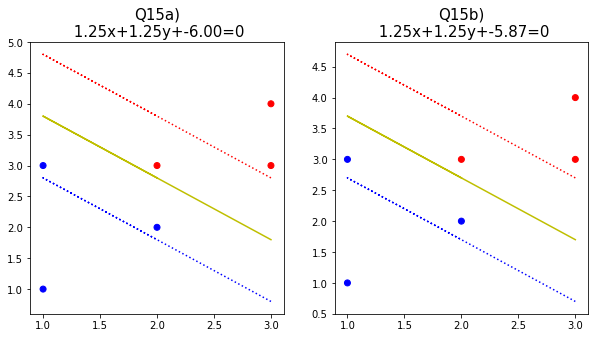

In [34]:
import matplotlib.pyplot as plt
x, y = X.T
c = ['red' if i > 0 else 'blue' for i in z]
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
# w1 * x + w2 * y + b = 0
# y = -(w1 * x + b) / w2
ax1.scatter(x, y, c=c)
ax1.set_title('Q15a)\n {:.2f}x+{:.2f}y+{:.2f}=0'.format(w1_a, w2_a, b_a),\
              fontsize=15)
ax1.plot(x, -(w1_a * x + b_a) / w2_a, c='y')
# w1 * x + w2 * y + b = 1
# y = 1 -(w1 * x + b) / w2
ax1.plot(x, 1-(w1_a * x + b_a) / w2_a, c='r', linestyle='dotted')
# w1 * x + w2 * y + b = -1
# y = -1 -(w1 * x + b) / w2
ax1.plot(x, -1-(w1_a * x + b_a) / w2_a, c='b', linestyle='dotted')
#
ax2.scatter(x, y, c=c)
ax2.set_title('Q15b)\n {:.2f}x+{:.2f}y+{:.2f}=0'.format(w1_b, w2_b, b_b),\
                            fontsize=15)
ax2.plot(x, -(w1_b * x + b_b) / w2_b, c='y')
ax2.plot(x, 1-(w1_b * x + b_b) / w2_b, c='r', linestyle='dotted')
ax2.plot(x, -1-(w1_b * x + b_b) / w2_b, c='b', linestyle='dotted')
